# Algoritmo de Simon


Fábio Alves de Freitas  
Universidade Federal Rural de Pernambuco

## Introdução

O algoritmo de simon trata de encontrar padrões em funções da seguinte forma. Dado uma função  $f:${0,1}$^n$ $\rightarrow$ {0,1}$^n$ na qual $f(x) = f(y)$ se e somente se $x = y \oplus c$. Ou seja, teremos pares de entradas equivalentes. O objetivo do algoritmo é encontrar o valor $c$ que gera este padrão na função de entrada. $c$ é uma string binária da seguinte forma: 
$c_1,c_2,...,c_n$. Podemos analisar melhor o formato de uma função deste gênero com os exemplos abaixo.

---
Exemplo de $função$ com $n = 3:$     

$f(000) = f(111) = 001$  
$f(001) = f(110) = 010$  
$f(010) = f(101) = 100$  
$f(011) = f(100) = 110$  

---

Exemplo de mapeamento para $c = 010:$

$000 \oplus 010 = 010$  
$001 \oplus 010 = 011$  
$010 \oplus 010 = 000$        
$011 \oplus 010 = 001$    
$100 \oplus 010 = 110$   
$101 \oplus 010 = 111$   
$110 \oplus 010 = 100$  
$111 \oplus 010 = 101$

logo a função será: 

$f(000) = f(010)$  
$f(001) = f(011)$  
$f(100) = f(110)$  
$f(101) = f(111)$

---

Exemplo de mapeamento para $c = 000:$

$000 \oplus 000 = 000$  
$001 \oplus 000 = 001$  
$010 \oplus 000 = 010$        
$011 \oplus 000 = 011$    
$100 \oplus 000 = 100$   
$101 \oplus 000 = 101$   
$110 \oplus 000 = 110$  
$111 \oplus 000 = 111$

Caso o $c$ seja uma sequência de zeros $(0^n)$, então a função será um mapeamento de um para um.

---



 ## Complexidade do algoritmo
 
 Para resolver este problema da forma clássica poderíamos fazer da seguinte forma: testar muitas entradas sobre a função e anotar os resultados, se num determinado momento um valor repetido surgisse, então poderiamos descobrir o valor de $c$.

$x_1 \oplus x_2 = c$

Para uma função de strings de comprimento $n$, no pior caso, teríamos que testar metade das strings, na qual todas terial valores diferentes, mais uma adicional, que garantiria que pelo menos um dos testes anteriores teria um valor igual ao último teste.
 
$\dfrac{2^n}{2}+1 =    2^{n-1}+1 = O(2^n)$

Ou seja, a complexidade seria exponencial para o algoritmo clássico. Já o algoritmo quântico possui custo linear $O(n)$, uma vez que podemos encontrar o valor de $c$ avaliando a função $n$ vezes.


## O algoritmo

A solução deste problema mais eficiente utilizando a computação quântica. O funcionamento do algoritmo acontece da seguinte forma: 

1.) Colocamos na entrada duas strings de tamanho $n$ formadas apenas por zero.  
$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |0\rangle^{\otimes n}$  

2.) Aplicamos o hadamard nos $n$ qubits do topo, deixando-os em superposição.  
$|\psi_1\rangle = (H^{\otimes n} \otimes I^{\otimes n}) |\psi_0\rangle$

3.) Aplicamos o operador $U_f$ sobre os qubits e a função $f$ de entrada.  
$|\psi_2\rangle = U_f |\psi_1\rangle$ 

4.) Aplicamos novamente o haddamard nos $n$ qubits do topo, tirando-os de superposição.  
$|\psi_3\rangle = (H^{\otimes n} \otimes I^{\otimes n}) |\psi_2\rangle$

5.) Medimos os $n$ qubits do topo. Eles formaram um sistema linear. Resolvendo o sistema poderemos determinar o valor de $c$.




## Explicação matemática

O porquê o algoritmo funcionar fica mais claro observando do ponto de vista matemático. Seguindo cada etapa do algoritmo ($|\psi_0\rangle$ a $|\psi_3\rangle$) temos as seguintes formulações matemáticas:


1.) No início temos os $(2*n)$  kats zero como inicialização. Como todos os kats estão em paraleto, então nós aplicamos a operação tensorial entre eles para formar este estado.  
$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |0\rangle^{\otimes n}$  


2.) Iremos aplicar o hadamard nos $n$ qubits do topo e a identidade nos demais. Sabendo que todos os $n$ qubits do topo são zero, então a aplicação do hadamard irá gerar todas as combinações possíveis para strings binárias nos $n$ qubits do topo. Podemos escrever isto de forma mais compacta com um somatório. Basta repetir os $n$ qubits debaixo, pois estamos aplicando a identidade neles. O $|\psi_1\rangle$ ficará da seguinte forma.  
$|\psi_1\rangle = \dfrac{\sum_{x\in(0,1)^n} |x,0\rangle}{\sqrt{2^n}}$


3.) Aplicando o operador $U_f$. Este operador leva uma entrada $|x, y\rangle$ para $|x, y\oplus f(x)\rangle$. No estado atual do algoritmo podemos observar que o $n$ qubits debaixo são kats zero. Aplicando a operação temos que: $|x, 0\oplus f(x)\rangle$, que é igual a $|x, f(x)\rangle$. Como devemos aplicar esta regra para todos os $n$ qubits debaixo, então podemos escrever o somatório da seguinte forma.  
$|\psi_2\rangle = \dfrac{\sum_{x\in(0,1)^n} |x,f(x)\rangle}{\sqrt{2^n}}$


4.) Nesta etapa, precisamos aplicar novamente o hadamard nos $n$ qubits do topo. Como já temos um somatório e a aplicação do hadamard em vários qubits é representado por um somatório, então escreveremos isto utilizando dois somatórios. Nesta etapa os $n$ qubits do topo não todos kats zero, então é necessário aplicar a notação completa que utiliza o produto interno entre elementos de ambos os somatórios.  
$|\psi_3\rangle = \dfrac{  \sum_{x\in(0,1)^n}( \sum_{z\in(0,1)^n} (-1)^{\langle z,x \rangle}|z,f(x)\rangle   )}{2^n}$

Após todas estas etapas, iremos medir os $n$ qubits do topo. De acordo com a definição do algoritmo, caso o valor de $c$ seja diferente de zero, então sabemos que cada $f(x)$ tem outra entrada com mapeamento equivalente na função:  
$y = x \oplus c$, ou seja, $f(x) = f(x \oplus c)$  

Com esta informação e sabendo que na etapa quatro do algoritmo nós avaliamos todas as entradas da função (assumindo $c \ne 0$) temos que as entradas equivalentes estão sendo somadas:

$\dfrac{(-1)^{\langle z,x \rangle} + (-1)^{\langle z,y \rangle}}{2^n}$ =
$\dfrac{(-1)^{\langle z,x \rangle} + (-1)^{\langle z,x \oplus c \rangle}}{2^n}$ =
$\dfrac{(-1)^{\langle z,x \rangle} + (-1)^{\langle z,x \rangle \oplus \langle z,c \rangle}}{2^n}$ =
$\dfrac{(-1)^{\langle z,x \rangle}( 1 + (-1)^{\langle z,c \rangle})}{2^n}$

Após todas essas simplificações, podemos observar que $\langle z,c \rangle$ pode valor 0 ou 1.

---
1. caso $\langle z,c \rangle = 1$ 

$\dfrac{(-1)^{\langle z,x \rangle}( 1 + (-1)^{1} )}{2^n}$ = 
$\dfrac{(-1)^{\langle z,x \rangle}( 1 - 1 )}{2^n}$ = 
$\dfrac{(-1)^{\langle z,x \rangle}(0)}{2^n}$ = 
$\dfrac{0}{2^n}$ = 
$0$

Se $\langle z,c \rangle = 1$, então não podemos extrair nada sobre o valor de $c$.

---
2. caso $\langle z,c \rangle = 0$ 

$\dfrac{(-1)^{\langle z,x \rangle}( 1 + (-1)^{0} )}{2^n}$ = 
$\dfrac{(-1)^{\langle z,x \rangle}( 1 + 1 )}{2^n}$ = 
$\dfrac{(-1)^{\langle z,x \rangle}( 2 )}{2^n}$ 

Se $\langle z,c \rangle = 0$, então poderemos extrair informação útil para descobrir o $c$, pois o resultado não será nulo.

---



## Descobrindo o valor de $c$

Para descobrir o valor de $c$ nós executamos o algoritmo diversas vezes sobre a mesma função. Após isto, caso os elementos equivalentes tiverem o $\langle z,c \rangle = 0$, então poderemos escrever um sistema linear. Resolvendo este sistema linear descobriremos o $c$.

Exemplo:

1. $\langle 000,c \rangle = 0$  
1. $\langle 001,c \rangle = 0$  
1. $\langle 110,c \rangle = 0$
1. $\langle 111,c \rangle = 0$


podemos escrever isto como:

1. $0c_1 \oplus 0c_2 \oplus 0c_3 = 0$  
1. $0c_1 \oplus 0c_2 \oplus 1c_3 = 0$  
1. $1c_1 \oplus 1c_2 \oplus 0c_3 = 0$  
1. $1c_1 \oplus 1c_2 \oplus 1c_3 = 0$  

temos que:

1. $1c_3 = 0$   
1. $1c_1 \oplus 1c_2 = 0$  
1. $1c_1 \oplus 1c_2 \oplus 1c_3 = 0$  

Após resolver o sistema temos que: $(c_1 = 1$, $c_2 = 1$ e $c_3 = 0)$ ou $(c_1 = 0$, $c_2 = 0$ e $c_3 = 0)$, mas como $c \ne 000$, então a resposta será o primeiro caso. $c = c_1 c_2 c_3$, então  $c = 110$

## Implementação

A implementação do algoritmo é feita considerando $n = 2$ para a função abaixo:

$f(00) = f(10) = 10$  
$f(01) = f(11) = 01$

$U_f|00,00\rangle = |00,f(00)\oplus 00\rangle = |00,10\oplus 00\rangle = |00,10\rangle$  
$U_f|00,01\rangle = |00,f(00)\oplus 01\rangle = |00,10\oplus 01\rangle = |00,11\rangle$  
$U_f|00,10\rangle = |00,f(00)\oplus 10\rangle = |00,10\oplus 10\rangle = |00,00\rangle$  
$U_f|00,11\rangle = |00,f(00)\oplus 11\rangle = |00,10\oplus 11\rangle = |00,01\rangle$  
$U_f|01,00\rangle = |01,f(01)\oplus 00\rangle = |00,01\oplus 00\rangle = |01,01\rangle$  
$U_f|01,01\rangle = |01,f(01)\oplus 01\rangle = |00,01\oplus 01\rangle = |01,00\rangle$  
$U_f|01,10\rangle = |01,f(01)\oplus 10\rangle = |00,01\oplus 10\rangle = |01,11\rangle$  
$U_f|01,11\rangle = |01,f(01)\oplus 11\rangle = |00,01\oplus 11\rangle = |01,10\rangle$  
$U_f|10,00\rangle = |10,f(10)\oplus 00\rangle = |00,10\oplus 00\rangle = |10,10\rangle$  
$U_f|10,01\rangle = |10,f(10)\oplus 01\rangle = |00,10\oplus 01\rangle = |10,11\rangle$  
$U_f|10,10\rangle = |10,f(10)\oplus 10\rangle = |00,10\oplus 10\rangle = |10,00\rangle$  
$U_f|10,11\rangle = |10,f(10)\oplus 11\rangle = |00,10\oplus 11\rangle = |10,01\rangle$  
$U_f|11,00\rangle = |11,f(11)\oplus 00\rangle = |00,01\oplus 00\rangle = |11,01\rangle$  
$U_f|11,01\rangle = |11,f(11)\oplus 01\rangle = |00,01\oplus 01\rangle = |11,00\rangle$  
$U_f|11,10\rangle = |11,f(11)\oplus 10\rangle = |00,01\oplus 10\rangle = |11,11\rangle$  
$U_f|11,11\rangle = |11,f(11)\oplus 11\rangle = |00,01\oplus 11\rangle = |11,10\rangle$  

Caso os dois qubits do topo sejam 00 ou 10, então o terceiro qubit é invertido. Caso os dois qubits do topo sejam 01 ou 11, então o quarto qubit é invertido. A implementação do circuito desta função está logo no código.


In [1]:
import qiskit as qkit
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
import time
import Qconfig
qkit.register(Qconfig.APItoken, Qconfig.config['url'])

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\wrapper\_wrapper.py:68: DeprecationWarning: register() will be deprecated after 0.6. Please use the qiskit.IBMQ.enable_account() method instead.
  DeprecationWarning)


In [2]:
#criando 4 qubits, pois para n = 2 teremos essa quantidade como inicializaçao.
rq = qkit.QuantumRegister(size=4)

#criando 2 bits clássico, pois avaliaremos os n qubits do topo.
rc = qkit.ClassicalRegister(size=2)

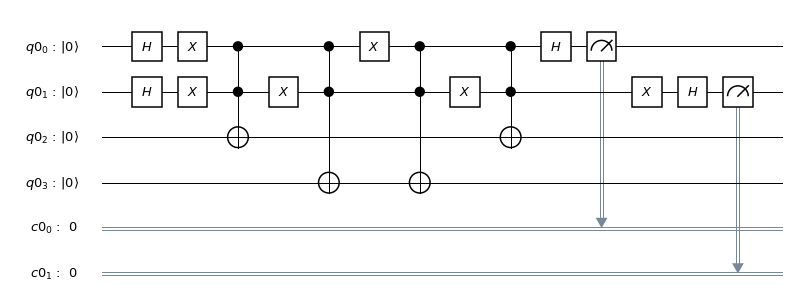

In [3]:
#inicializando os qubits e o bit
simon = qkit.QuantumCircuit(rq, rc)

#hadamard nos n primeiros qubits
simon.h(rq[0])
simon.h(rq[1])

###################### Uf ###################### 

simon.x(rq[0])
simon.x(rq[1])
simon.ccx(rq[0], rq[1], rq[2]) 
simon.x(rq[1])
simon.ccx(rq[0], rq[1], rq[3])
simon.x(rq[0])
simon.ccx(rq[0], rq[1], rq[3])
simon.x(rq[1])
simon.ccx(rq[0], rq[1], rq[2])
simon.x(rq[1])

################################################ 


#hadamard nos n primeiros qubits
simon.h(rq[0])
simon.h(rq[1])

#medição dos n qubits do topo 
simon.measure(rq[0], rc[0])
simon.measure(rq[1], rc[1])
circuit_drawer(simon)

### Simulação num Computador Clássico

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\wrapper\_wrapper.py:312: DeprecationWarning: execute() no longer takes backend string names. Please pass backend objects, obtained viaIBMQ.get_backend() or Aer.get_backend().
  'IBMQ.get_backend() or Aer.get_backend().', DeprecationWarning)


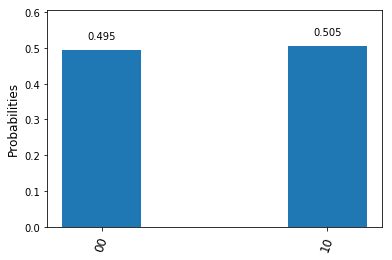

In [6]:

backend = "local_qasm_simulator"
shots = 1000
job = qkit.execute(simon, backend=backend, shots=shots)
k = 0
wait_time = 1

"""while not job.done:
    print(job.status)
    print('waiting '+ str(k) + ' segundos' )
    k = k + wait_time
    time.sleep(wait_time)
"""
results_sim = job.result() 
outputs_sim = results_sim.get_counts()

plot_histogram(outputs_sim)


### Simulação num Computador Quântico

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\wrapper\_wrapper.py:312: DeprecationWarning: execute() no longer takes backend string names. Please pass backend objects, obtained viaIBMQ.get_backend() or Aer.get_backend().
  'IBMQ.get_backend() or Aer.get_backend().', DeprecationWarning)


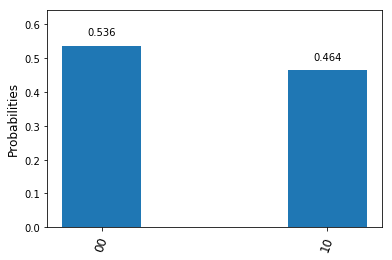

In [7]:
backend = "ibmq_qasm_simulator"

shots = 1000
job = qkit.execute(simon, backend=backend, shots=shots)
k = 0
wait_time = 10

"""while not job.done:
    print(job.status)
    print('waiting '+ str(k) + ' segundos' )
    k = k + wait_time
    time.sleep(wait_time)
"""

results = job.result() 
outputs = results.get_counts()

plot_histogram(outputs)

### Discussão

Com este algoritmo podemos ter um tremendo ganho computacional em comparação ao custo de implementar este algoritmo num computador clássico, pois partimos de um custo exponencial $O(2^n)$ para um linear $O(n)$. Há pesquisas mostrando usos para o algoritmo de simon no ramo da criptografia.

***
## Referências
Yanofsky, Noson S. and Mirco A. MannucciQuantum computing for computer scientists. Cambridge: Cambridge University Press, 2008.  
Nielsen, Michael A., and Isaac Chuang. "Quantum computation and quantum information." (2002): 558-559.